In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 런타임 재시작

In [1]:
import matplotlib.pyplot as plt # 맷플롯립 import 하기
plt.rcParams['font.family'] = 'NanumBarunGothic' # 나눔바른고딕 적용하기

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# 데이터 불러오기
df = pd.read_excel('시도별 전출입 인구수.xlsx', engine='openpyxl', header=0)
df.head()

In [ ]:
df.info()

In [4]:
# 누락(nan)을 앞에 데이터로 채움
df = df.fillna(method='ffill')

In [ ]:
df

In [5]:
# 서울에서 다른 지역으로 이동한 데이터만 추출
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]

In [6]:
df_seoul = df_seoul.drop(['전출지별'], axis=1)

In [7]:
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)

In [ ]:
# 서울에서 경기도로 이동한 인구 데이터 값만 선택
sr_one = df_seoul.loc['경기도']
sr_one

In [ ]:
plt.plot(sr_one.index, sr_one.values)

In [ ]:
plt.plot(sr_one)

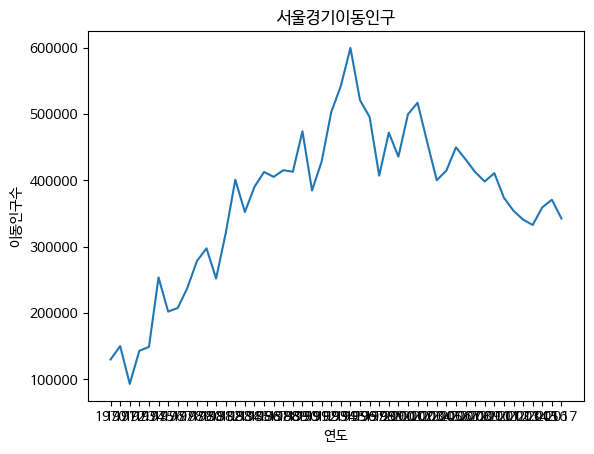

In [10]:
# 차트 제목
plt.title('서울경기이동인구')
plt.plot(sr_one)
plt.xlabel('연도')
plt.ylabel('이동인구수')
plt.show()

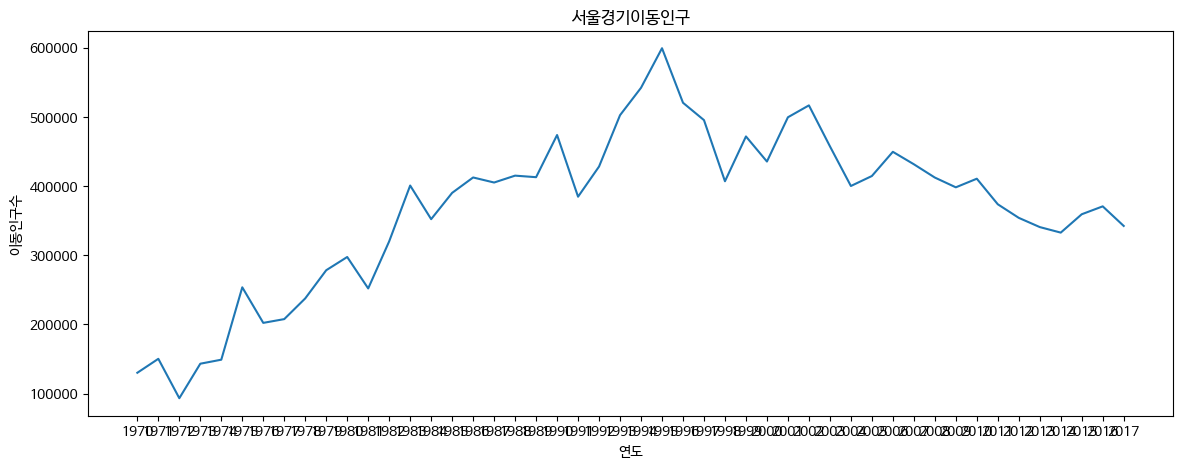

In [11]:
# 그림크기 키우기
plt.figure(figsize=(14, 5))
plt.title('서울경기이동인구')
plt.plot(sr_one)
plt.xlabel('연도')
plt.ylabel('이동인구수')
plt.show()

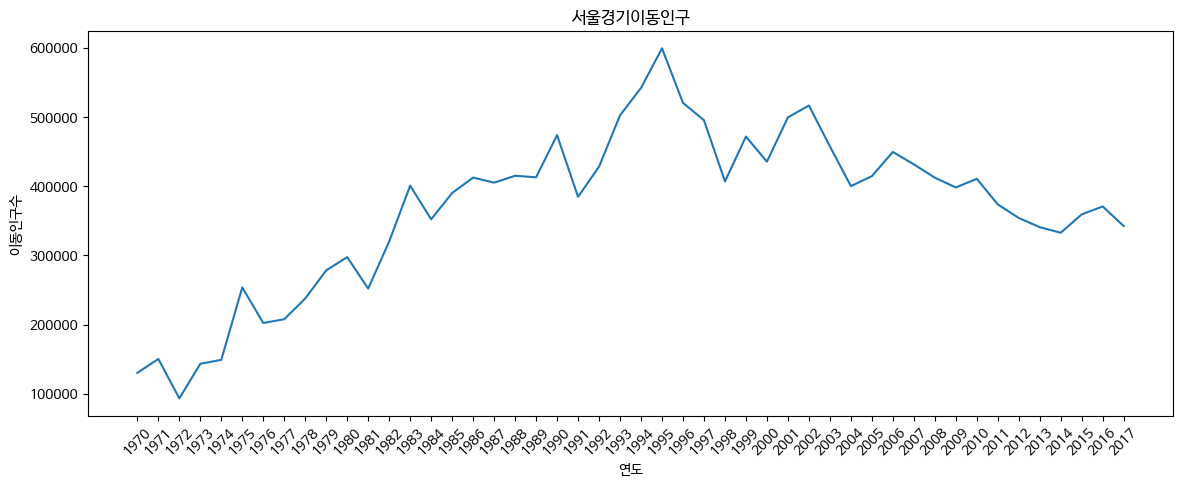

In [13]:
# x축 눈금 라벨을 회전하기
plt.figure(figsize=(14, 5))
plt.title('서울경기이동인구')
plt.plot(sr_one)
plt.xlabel('연도')
plt.xticks(rotation=45)
plt.ylabel('이동인구수')
plt.show()

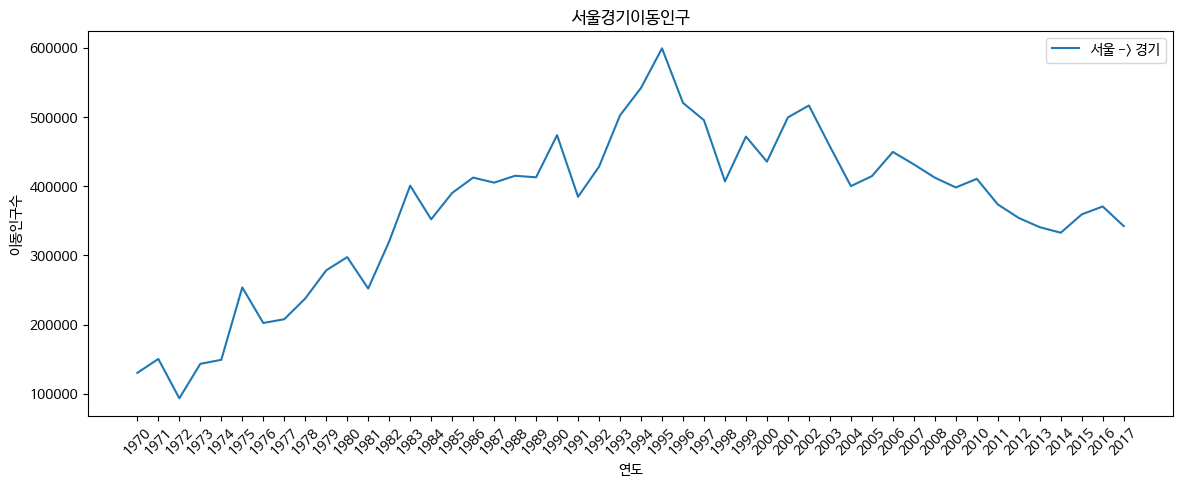

In [16]:
# 범례
plt.figure(figsize=(14, 5))
plt.title('서울경기이동인구')
plt.plot(sr_one)
plt.xlabel('연도')
plt.xticks(rotation=45)
plt.ylabel('이동인구수')
plt.legend(labels=['서울 -> 경기'], loc='best')
plt.show()

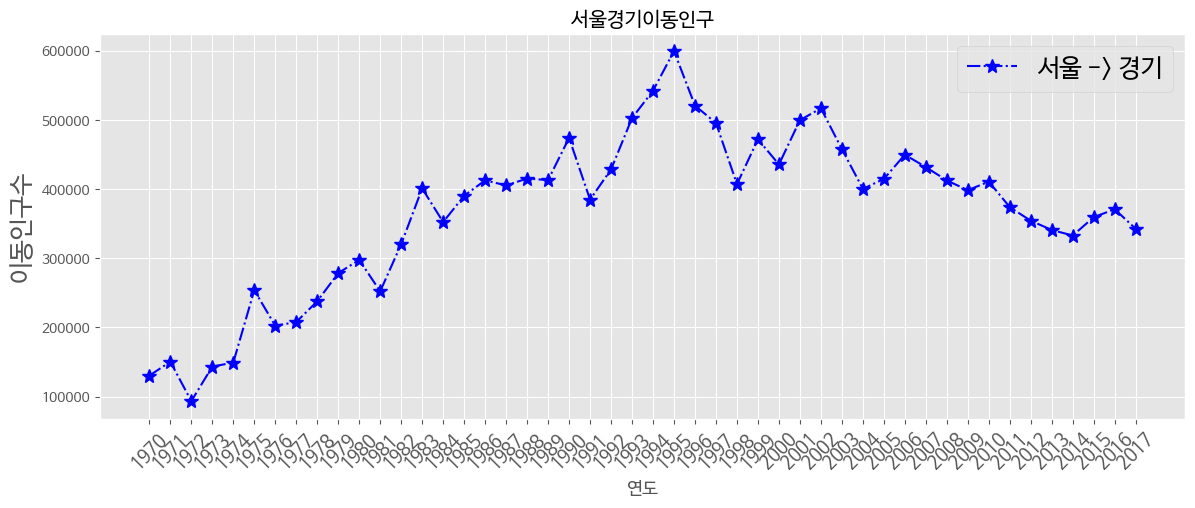

In [41]:
# 스타일 서식 지정
plt.style.use('ggplot')
plt.figure(figsize=(14, 5))
plt.title('서울경기이동인구')
plt.plot(sr_one, marker='*', markersize=10, linestyle='-.',color='blue')
plt.xlabel('연도',size=13)
plt.xticks(rotation=45, size=13)
plt.ylabel('이동인구수', size=18)
plt.legend(labels=['서울 -> 경기'], loc='best', fontsize=18)
plt.show()

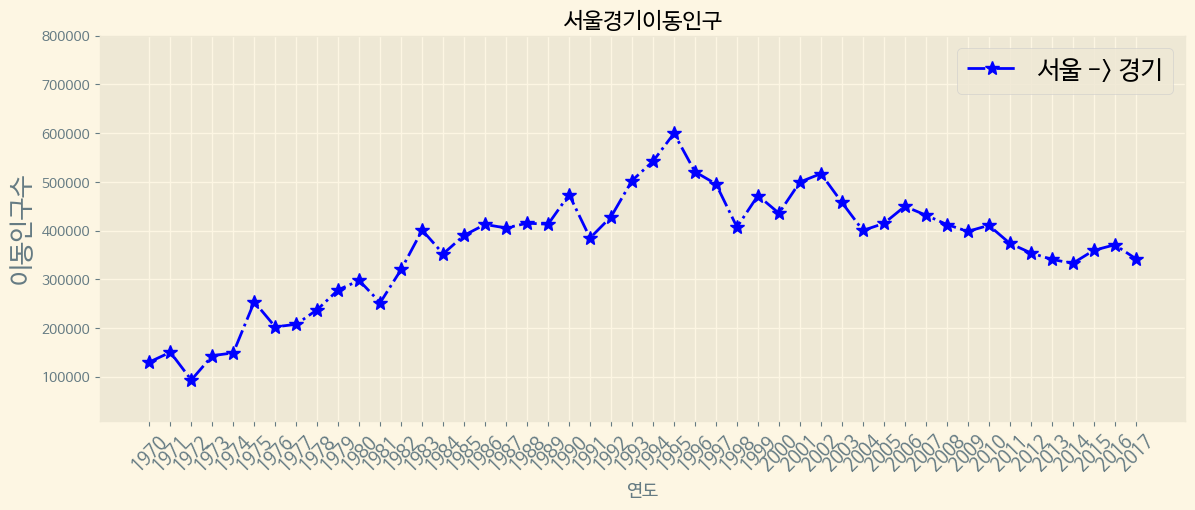

In [45]:
# 스타일 서식 지정
plt.style.use('Solarize_Light2')
plt.figure(figsize=(14, 5))
plt.title('서울경기이동인구')
plt.plot(sr_one, marker='*', markersize=10, linestyle='-.',color='blue')
plt.xlabel('연도',size=13)
plt.xticks(rotation=45, size=13)
plt.ylim(10000, 800000)
plt.ylabel('이동인구수', size=18)
plt.legend(labels=['서울 -> 경기'], loc='best', fontsize=18)
plt.show()

In [42]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

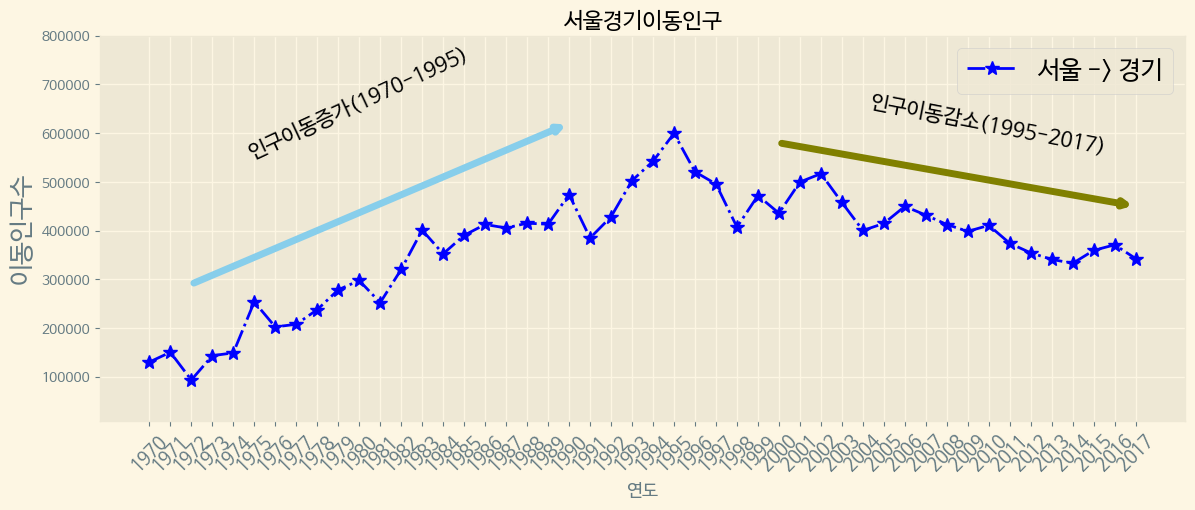

In [49]:
# 스타일 서식 지정
plt.style.use('tableau-colorblind10')
plt.figure(figsize=(14, 5))
plt.title('서울경기이동인구')
plt.plot(sr_one, marker='*', markersize=10, linestyle='-.', color='blue')
plt.xlabel('연도',size=13)
plt.xticks(rotation=45, size=13)
plt.ylim(10000, 800000)
plt.ylabel('이동인구수', size=18)
plt.legend(labels=['서울 -> 경기'], loc='best', fontsize=18)
# 주석표시 - 화살표
plt.annotate("", xy=(20, 620000), xytext=(2, 290000), xycoords='data',
             arrowprops=dict(arrowstyle='->', color='skyblue', lw=5))
plt.annotate("", xy=(47, 450000), xytext=(30, 580000), xycoords='data',
             arrowprops=dict(arrowstyle='->', color='olive', lw=5))
# 주석표시 텍스트
plt.annotate("인구이동증가(1970-1995)", xy=(10, 550000),
             rotation=25, va='baseline', ha='center', fontsize =15)
plt.annotate("인구이동감소(1995-2017)", xy=(40, 560000),
             rotation= -11, va='baseline', ha='center', fontsize =15)
plt.show()

In [ ]:
# 서울에서 '충청남도', '경상북도', '강원도' 인구데이터 값만 선택
col_years = list(map(str, range(1970, 2018)))
df_1 = df_seoul.loc[['충청남도', '경상북도', '강원도'], col_years]
df_1

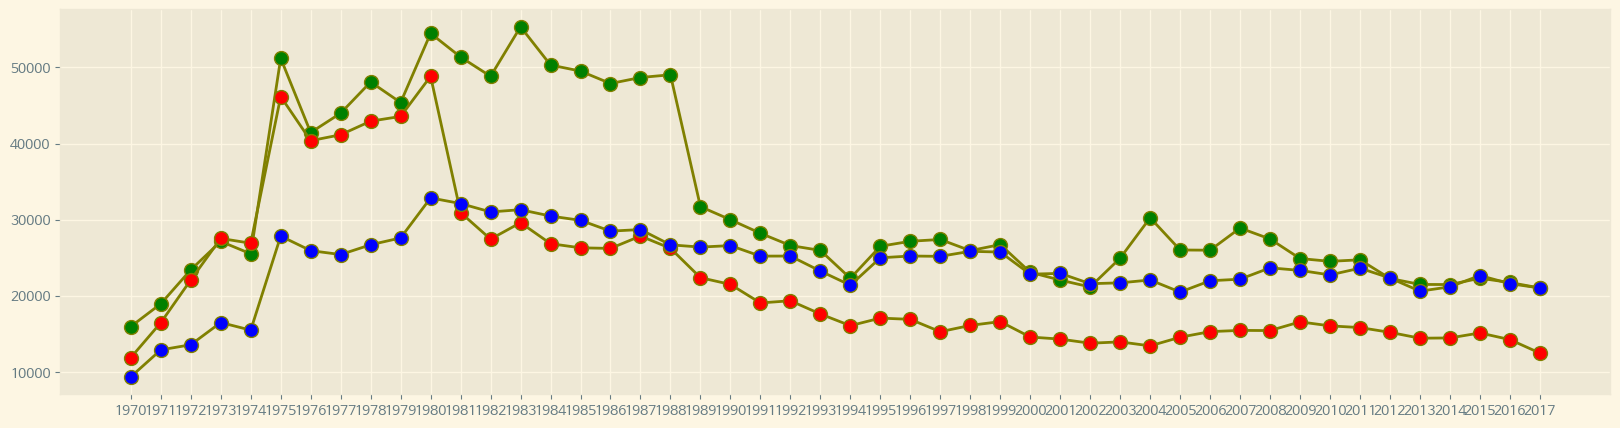

In [52]:
fig = plt.figure(figsize=(20, 5))
ax = fig.add_subplot(1,1,1)
ax.plot(col_years, df_1.loc['충청남도'], marker='o', markerfacecolor='green',
        markersize=10, color='olive', linewidth=2, label = '서울 -> 충남')
ax.plot(col_years, df_1.loc['경상북도'], marker='o', markerfacecolor='red',
        markersize=10, color='olive', linewidth=2, label = '서울 -> 경상북도')
ax.plot(col_years, df_1.loc['강원도'], marker='o', markerfacecolor='blue',
        markersize=10, color='olive', linewidth=2, label = '서울 -> 강원도')
plt.show()

In [ ]:
# 따로그려보기
df_2 = df_seoul.loc[['충청남도', '경상북도', '강원도', '전라남도'], col_years]
df_2

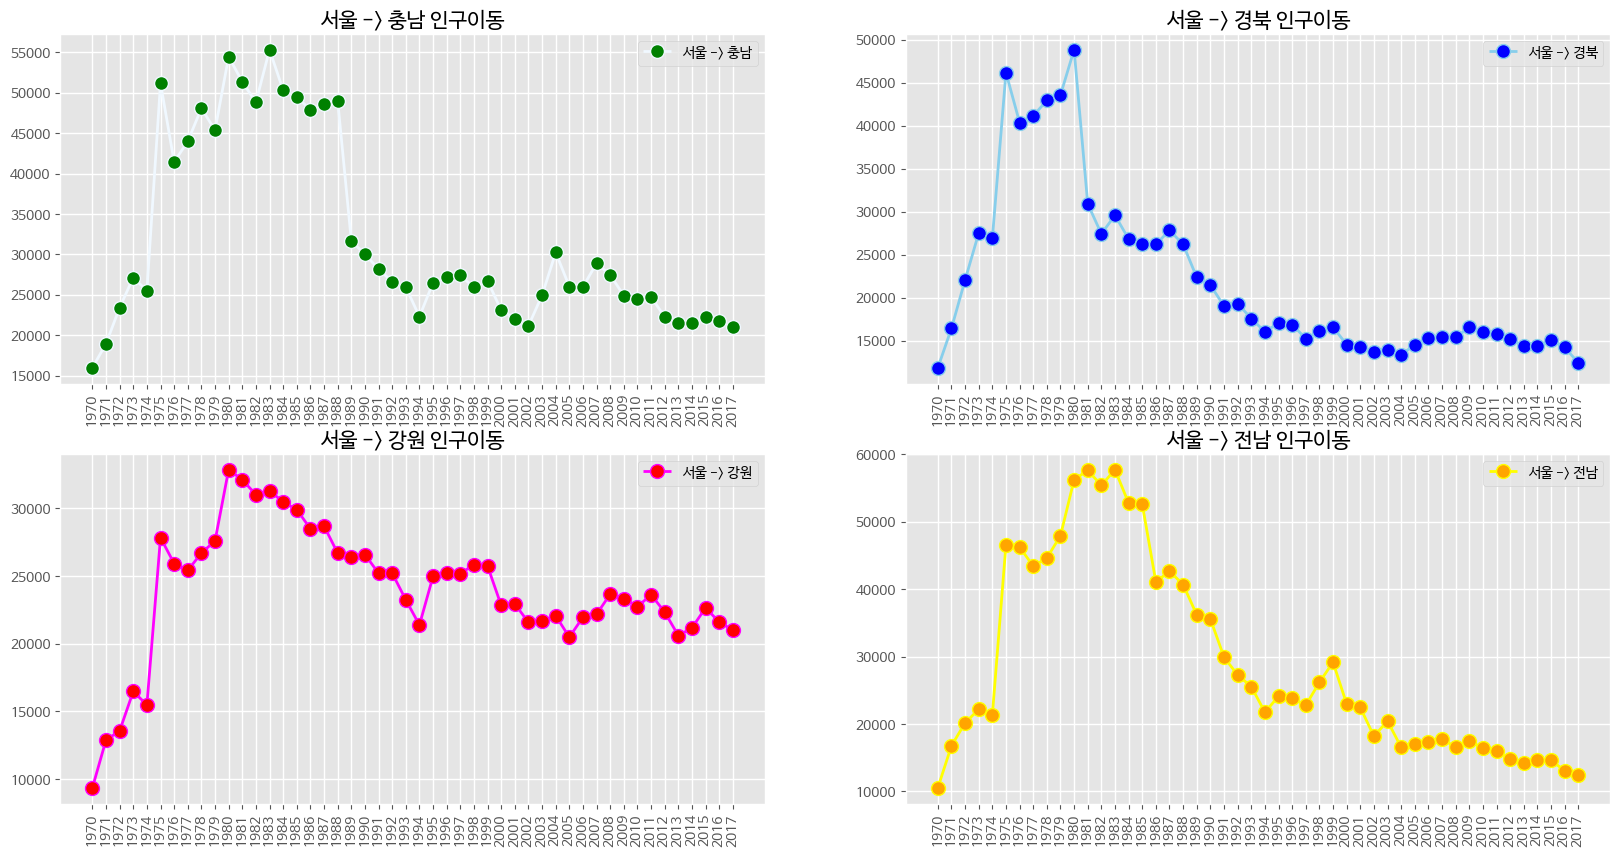

In [66]:
import warnings
warnings.filterwarnings("ignore")
# 그래프 객체 생성
plt.style.use('ggplot')
fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

ax1.plot(col_years, df_2.loc['충청남도', :], marker='o', markerfacecolor='green',
         markersize=10, color='#F0F8FF', linewidth=2, label='서울 -> 충남')
ax2.plot(col_years, df_2.loc['경상북도', :], marker='o', markerfacecolor='blue',
         markersize=10, color='skyblue', linewidth=2, label='서울 -> 경북')
ax3.plot(col_years, df_2.loc['강원도', :], marker='o', markerfacecolor='red',
         markersize=10, color='magenta', linewidth=2, label='서울 -> 강원')
ax4.plot(col_years, df_2.loc['전라남도', :], marker='o', markerfacecolor='orange',
         markersize=10, color='yellow', linewidth=2, label='서울 -> 전남')
# 범례
ax1.legend(loc='best')
ax2.legend(loc='best')
ax3.legend(loc='best')
ax4.legend(loc='best')
#제목
ax1.set_title('서울 -> 충남 인구이동', size=15)
ax2.set_title('서울 -> 경북 인구이동', size=15)
ax3.set_title('서울 -> 강원 인구이동', size=15)
ax4.set_title('서울 -> 전남 인구이동', size=15)
# x축 연도 90도 회전
ax1.set_xticklabels(col_years, rotation=90)
ax2.set_xticklabels(col_years, rotation=90)
ax3.set_xticklabels(col_years, rotation=90)
ax4.set_xticklabels(col_years, rotation=90)
plt.show() #변경사항 저장하고 그래프 출력


In [60]:
import matplotlib
colors = {} #컬러를 담을 빈 딕셔너리
#컬러 이름과 헥사코드 확인하여 딕서너리에 입력
for name, hex in matplotlib.colors.cnames.items():
  colors[name] = hex

In [63]:
print(colors)
len(colors)

{'aliceblue': '#F0F8FF', 'antiquewhite': '#FAEBD7', 'aqua': '#00FFFF', 'aquamarine': '#7FFFD4', 'azure': '#F0FFFF', 'beige': '#F5F5DC', 'bisque': '#FFE4C4', 'black': '#000000', 'blanchedalmond': '#FFEBCD', 'blue': '#0000FF', 'blueviolet': '#8A2BE2', 'brown': '#A52A2A', 'burlywood': '#DEB887', 'cadetblue': '#5F9EA0', 'chartreuse': '#7FFF00', 'chocolate': '#D2691E', 'coral': '#FF7F50', 'cornflowerblue': '#6495ED', 'cornsilk': '#FFF8DC', 'crimson': '#DC143C', 'cyan': '#00FFFF', 'darkblue': '#00008B', 'darkcyan': '#008B8B', 'darkgoldenrod': '#B8860B', 'darkgray': '#A9A9A9', 'darkgreen': '#006400', 'darkgrey': '#A9A9A9', 'darkkhaki': '#BDB76B', 'darkmagenta': '#8B008B', 'darkolivegreen': '#556B2F', 'darkorange': '#FF8C00', 'darkorchid': '#9932CC', 'darkred': '#8B0000', 'darksalmon': '#E9967A', 'darkseagreen': '#8FBC8F', 'darkslateblue': '#483D8B', 'darkslategray': '#2F4F4F', 'darkslategrey': '#2F4F4F', 'darkturquoise': '#00CED1', 'darkviolet': '#9400D3', 'deeppink': '#FF1493', 'deepskyblue'

148

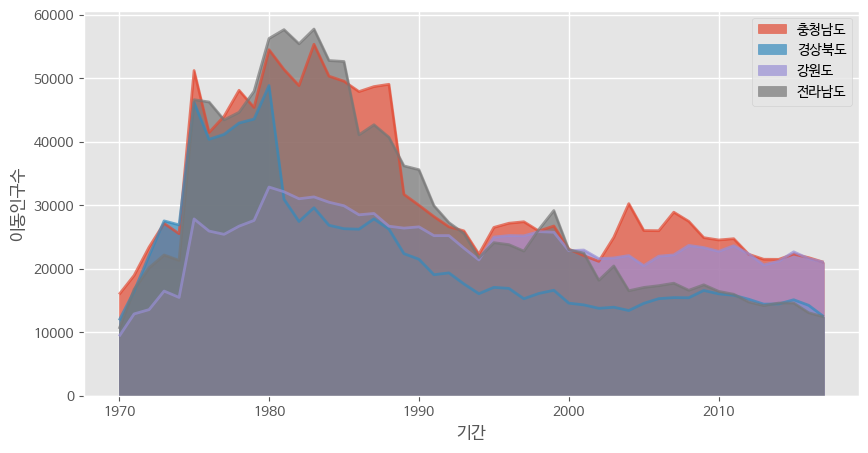

In [77]:
# 면적 그래프
df_2 = df_2.T
plt.style.use('ggplot')
df_2.index = df_2.index.map(int)
df_2.plot(kind='area', stacked=False, alpha=0.7, figsize=(10, 5))
plt.ylabel('이동인구수')
plt.xlabel('기간')
plt.legend(loc='best')
plt.show()

In [ ]:
# bar그래프
df_2 = df_2.T
df_2.index = df_2.index.map(int)
plt.style.use('ggplot')
df_2.plot(kind='bar', width=0.7, figsize=(10, 5), color=['orange', 'green', 'skyblue', 'blue'])
plt.ylabel('이동인구수')
plt.xlabel('기간')
plt.legend(loc='best')
plt.show()

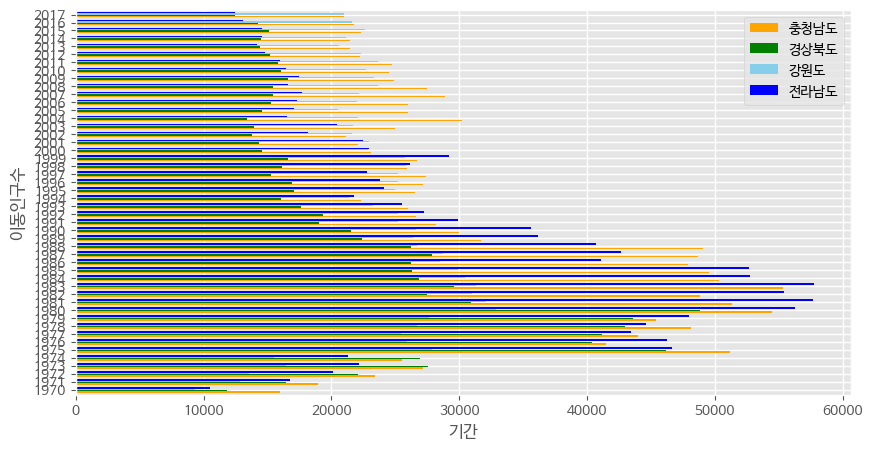

In [82]:
plt.style.use('ggplot')
df_2.plot(kind='barh', width=0.7, figsize=(10, 5), color=['orange', 'green', 'skyblue', 'blue'])
plt.ylabel('이동인구수')
plt.xlabel('기간')
plt.legend(loc='best')
plt.show()